<a href="https://colab.research.google.com/github/MichaelPaulukonis/notebooks/blob/main/min_dalle_(version).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# min(DALL·E)

In [1]:
#@title Save to Google Drive
#@markdown Will periodically save your results to Google Drive under the folder [TBD]

save_to_google_drive = True  #@param {type: "boolean"}

if save_to_google_drive:
  from google.colab import drive
  import time
  
  #@title Google Colab Google Drive Downloader Thing { vertical-output: true }
  Target_Folder = "/content/drive/MyDrive/colab_out/" #@param {type:"string"}
  drive.mount('/content/drive')
  
  !mkdir -p $Target_Folder

Mounted at /content/drive


### Install

In [2]:
! nvidia-smi
! pip install min-dalle==0.4.7
! pip install Pillow

Tue Aug  2 02:07:47 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    26W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### Load Model
`float32` is faster than `float16` but uses more GPU memory.

In [3]:
dtype = "float16" #@param ["float32", "float16", "bfloat16"]
from IPython.display import display, update_display
import torch
from min_dalle import MinDalle

model = MinDalle(
    dtype=getattr(torch, dtype),
    device='cuda',
    is_mega=True, 
    is_reusable=True
)

using device cuda
downloading tokenizer params
intializing TextTokenizer
downloading encoder params
initializing DalleBartEncoder
downloading decoder params
initializing DalleBartDecoder
downloading detokenizer params
initializing VQGanDetokenizer


### Generate Images

- `grid_size` Size of the image grid.  Reduce this if you run out of GPU memory.

- `progressive_outputs` Whether to show intermediate output.  Adds a small delay and increases memory usage.

- `seamless` Tiles the images in token space instead of pixel space

- `temperature` High temperature increases the probability of sampling low scoring image tokens.

- `supercondition_factor` Higher values result in better agreement with the text but a narrower variety of generated images

- `top_k` Each image token is sampled from the top $k$ most probable tokens

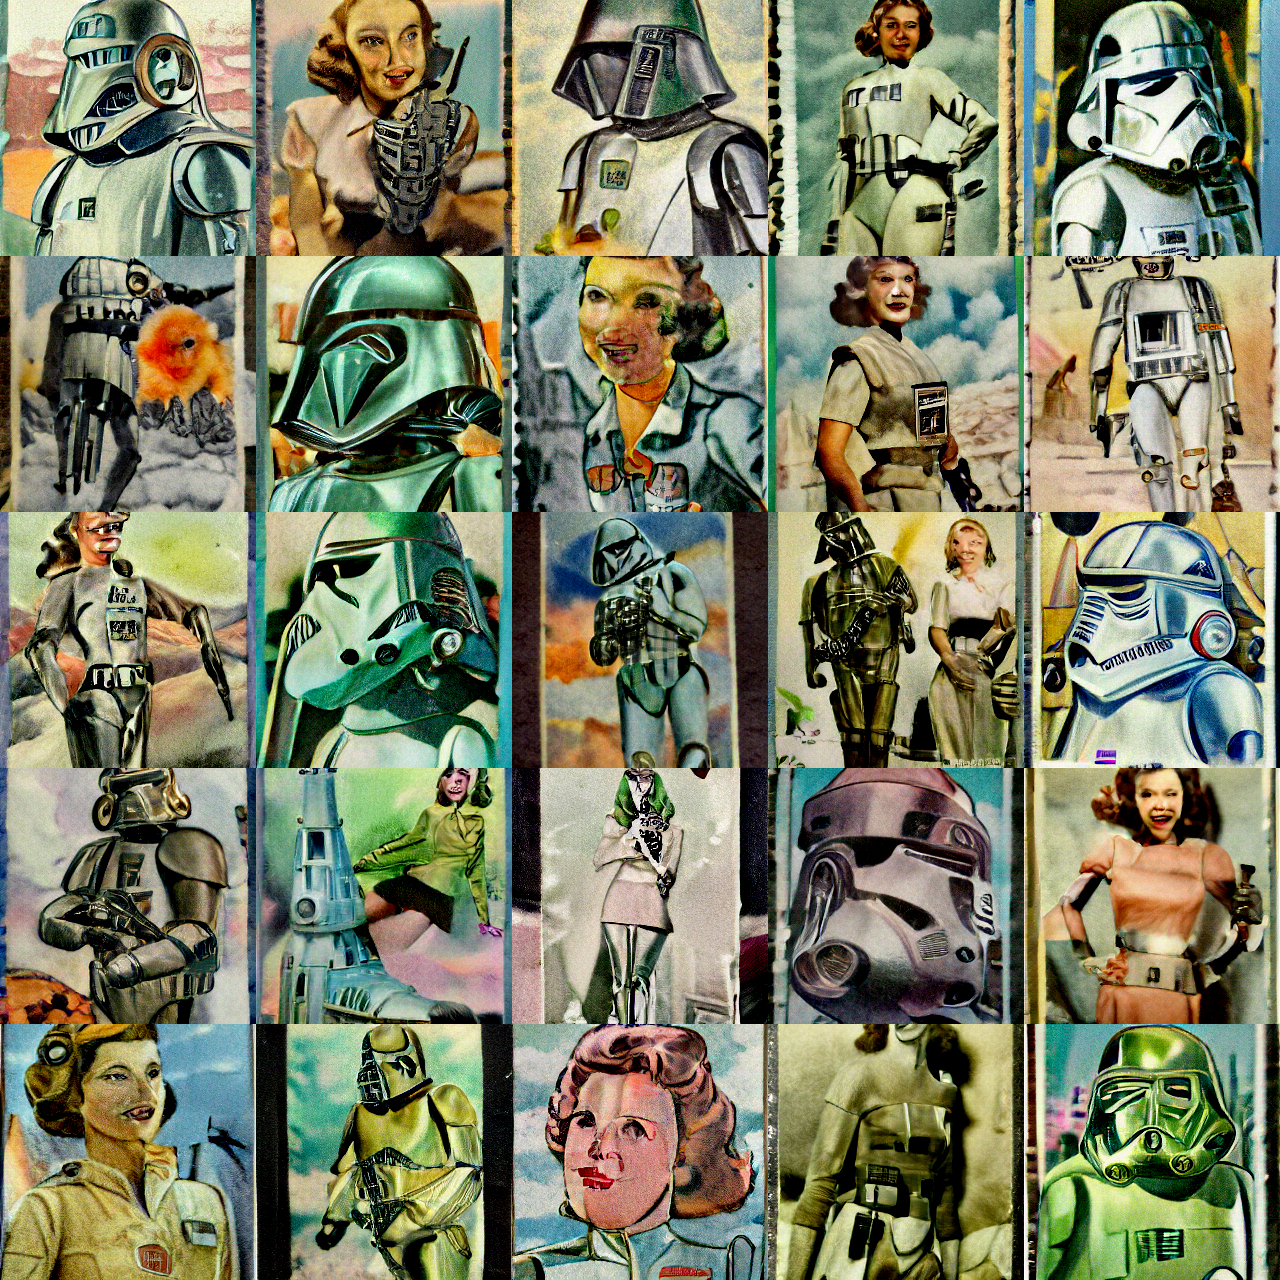

CPU times: user 1min 12s, sys: 1.28 s, total: 1min 14s
Wall time: 1min 14s


In [8]:
%%time

text = "Star Wars bubblegum card from the 1940s, photo of collectible trading card, dieselpunk" #@param {type:"string"}
if save_to_google_drive:
  image_prefix = "starwars" #@param {type:"string"}
progressive_outputs = False #@param {type:"boolean"}
seamless = False #@param {type:"boolean"}
grid_size =  5#@param {type:"integer"}
temperature = 12.2 #@param {type:"slider", min:0.01, max:16, step:0.01}
supercondition_factor =  64#@param {type:"number"}
top_k =  64#@param {type:"integer"}

image = model.generate_image(
    text=text,
    seed=-1,
    grid_size=grid_size,
    is_seamless=seamless,
    temperature=temperature,
    top_k=int(top_k),
    supercondition_factor=float(supercondition_factor)
)

display(image)

if save_to_google_drive:
  timestr = time.strftime("%Y%m%d-%H%M%S")
  image.save(f'{Target_Folder}/{image_prefix}_{timestr}_{temperature}_{supercondition_factor}_{top_k}.png')